#### Import Libraries

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Menggabungkan data 12 bulan sales ke dalam satu file .csv

In [8]:
files =[file for file in os.listdir('./Sales Data')]

allData = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales Data/'+file)
    allData = pd.concat([allData, df])
    
allData.to_csv('all_data.csv', index = False)

#### Read updated data frame

In [11]:
all_data = pd.read_csv('all_data.csv')

#### Clean up the data : remove NaN rows

In [14]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')

#### Clean up the data : remove 'Or'

In [17]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Clean up the data : convert Quantity Ordered and Price Each column into int and float type

In [21]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #convert to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #convert to float

#### Create new column : Month column

In [19]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

#### Create new column : Sales column

In [39]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

#### Create new column : City column

In [35]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1]+')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Data insight : Bulan dengan penjualan tertinggi

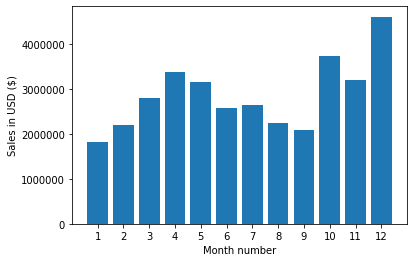

In [31]:
result = all_data.groupby('Month').sum()

months = range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Data insight : Kota dengan penjualan tertinggi

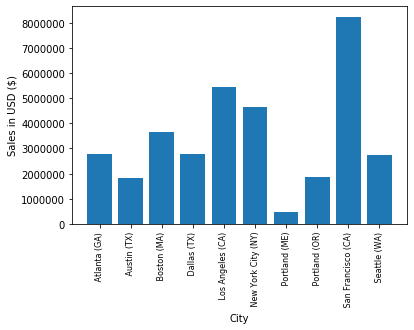

In [40]:
result = all_data.groupby('City').sum()

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation='vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

#### Data insight : Produk dengan penjual tertinggi

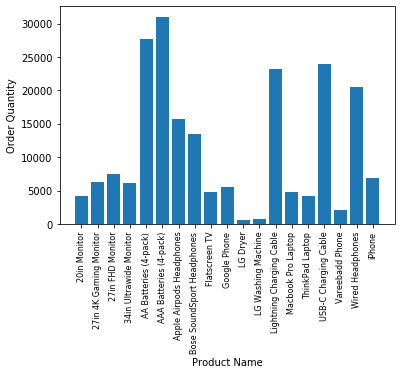

In [58]:
product = all_data.groupby('Product')
quantity = product['Quantity Ordered'].sum()

products = [product for product, df in product]

plt.bar(products, quantity)
plt.xticks(products, rotation='vertical', size = 8)
plt.ylabel('Order Quantity')
plt.xlabel('Product Name')
plt.show()


#### Data insight : Kapan waktu yang tepat bagi perusahaan untuk mengiklankan productnya?

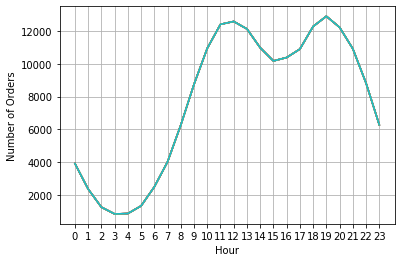

In [49]:
# Mengubah Order Date menjadi format Date and Time
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Menambahkan column Hour dan Minute
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute


# Visualiasi
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

#### Data Correlation : Korelasi antara harga product dan jumlah penjualan product

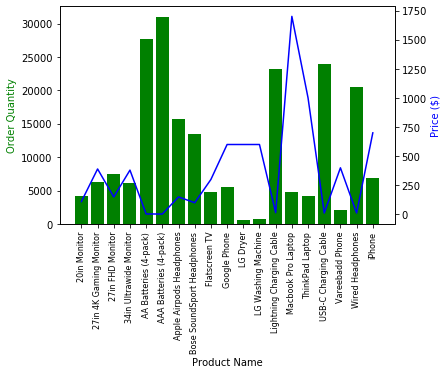

In [64]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Order Quantity',color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()
